In [72]:
import pandas as pd
from cyvcf2 import VCF

In [73]:
DOWNLOAD_PATH = "./downloads"

In [74]:
vcf_path = f"{DOWNLOAD_PATH}/clinvar.vcf.gz"

In [75]:
from cyvcf2 import VCF

def collect_unique_col_values(vcf_path: str, max_rows: int | None = None):
    """
    Iterate through a ClinVar VCF and collect all unique CLNSIG and CLNREVSTAT values.

    Parameters
    ----------
    vcf_path : str
        Path to the ClinVar VCF file (.vcf or .vcf.gz).
    max_rows : int | None
        Optional limit for testing (stop after N records).

    Returns
    -------
    tuple[set[str], set[str]]
        (unique_clnsig_values, unique_clnrevstat_values)
    """
    vcf = VCF(vcf_path)
    clnsig_values = set()
    clnrevstat_values = set()
    clnvc_values = set()

    for i, v in enumerate(vcf):
        info = v.INFO

        # Extract CLNSIG and CLNREVSTAT (may be pipe-delimited)
        clnsig_raw = info.get("CLNSIG")
        clnrevstat_raw = info.get("CLNREVSTAT")
        clnvc_raw = info.get("CLNVC")

        if clnsig_raw:
            for sig in str(clnsig_raw).split("|"):
                if sig.strip():
                    clnsig_values.add(sig.strip())

        if clnrevstat_raw:
            for rev in str(clnrevstat_raw).split("|"):
                if rev.strip():
                    clnrevstat_values.add(rev.strip())
        if clnvc_raw:
            for rev in str(clnvc_raw).split("|"):
                if rev.strip():
                    clnvc_values.add(rev.strip())

        if max_rows and i >= max_rows:
            break

    return clnsig_values, clnrevstat_values, clnvc_values


In [76]:
from cyvcf2 import VCF

def collect_unique_clnsig_revstat_clnvc(vcf_path: str, max_rows: int | None = None):
    """
    Iterate through a ClinVar VCF and collect unique values for
    CLNSIG, CLNREVSTAT, and CLNVC.

    Returns
    -------
    tuple[set[str], set[str], set[str]]
        (unique_clnsig_values, unique_clnrevstat_values, unique_clnvc_values)
    """
    vcf = VCF(vcf_path)
    clnsig_values: set[str] = set()
    clnrevstat_values: set[str] = set()
    clnvc_values: set[str] = set()

    for i, v in enumerate(vcf):
        info = v.INFO

        clnsig_raw = info.get("CLNSIG")
        # print(clnsig_raw)
        if clnsig_raw:
            for sig in str(clnsig_raw).split("|"):
                sig = sig.strip()
                if sig:
                    clnsig_values.add(sig)

        clnrevstat_raw = info.get("CLNREVSTAT")
        if clnrevstat_raw:
            for rev in str(clnrevstat_raw).split("|"):
                rev = rev.strip()
                if rev:
                    clnrevstat_values.add(rev)

        clnvc_raw = info.get("CLNVC")
        if clnvc_raw:
            # usually single-valued, but split defensively
            for vt in str(clnvc_raw).split("|"):
                vt = vt.strip()
                if vt:
                    clnvc_values.add(vt)

        if max_rows and (i + 1) >= max_rows:
            break

    return clnsig_values, clnrevstat_values, clnvc_values


clnsigs, revstats, clnvc_values = collect_unique_clnsig_revstat_clnvc(f"{DOWNLOAD_PATH}/clinvar.vcf")

print("CLNSIG unique values:", sorted(clnsigs))
print("CLNREVSTAT unique values:", sorted(revstats))
print("CLNVC unique values:", sorted(clnvc_values))


[W::vcf_parse] Contig '1' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig '2' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig '3' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig '4' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig '5' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig '7' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig '8' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig '9' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig '10' is not defined in the header. (Quick workaroun

CLNSIG unique values: ['Affects', 'Benign', 'Benign/Likely_benign', 'Conflicting_classifications_of_pathogenicity', 'Established_risk_allele', 'Likely_benign', 'Likely_pathogenic', 'Likely_pathogenic,_low_penetrance', 'Likely_pathogenic/Likely_pathogenic,_low_penetrance', 'Likely_pathogenic/Likely_risk_allele', 'Likely_pathogenic/Pathogenic,_low_penetrance', 'Likely_risk_allele', 'Pathogenic', 'Pathogenic,_low_penetrance', 'Pathogenic/Likely_pathogenic', 'Pathogenic/Likely_pathogenic,_low_penetrance', 'Pathogenic/Likely_pathogenic/Likely_risk_allele', 'Pathogenic/Likely_pathogenic/Pathogenic,_low_penetrance', 'Pathogenic/Likely_risk_allele', 'Pathogenic/Pathogenic,_low_penetrance', 'Uncertain_risk_allele', 'Uncertain_significance', 'Uncertain_significance/Uncertain_risk_allele', 'association', 'association_not_found', 'confers_sensitivity', 'drug_response', 'no_classification_for_the_single_variant', 'no_classifications_from_unflagged_records', 'not_provided', 'other', 'protective', 'r

[W::vcf_parse] Contig 'Y' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig 'MT' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig 'NT_113889.1' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig 'NT_113891.3' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig 'NT_187576.1' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig 'NT_187633.1' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig 'NT_187661.1' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig 'NT_187693.1' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig 'NW_009646201.1' is not defined in the header. (Quick workaround: index the file with tabix.)

In [77]:
# clnsigs, revstats, clnvc_values = collect_unique_clnsig_revstat_clnvc(f"{DOWNLOAD_PATH}/clinvar.vcf")

print("CLNSIG unique values:", sorted(clnsigs))
print("CLNREVSTAT unique values:", sorted(revstats))
print("CLNVC unique values:", sorted(clnvc_values))

CLNSIG unique values: ['Affects', 'Benign', 'Benign/Likely_benign', 'Conflicting_classifications_of_pathogenicity', 'Established_risk_allele', 'Likely_benign', 'Likely_pathogenic', 'Likely_pathogenic,_low_penetrance', 'Likely_pathogenic/Likely_pathogenic,_low_penetrance', 'Likely_pathogenic/Likely_risk_allele', 'Likely_pathogenic/Pathogenic,_low_penetrance', 'Likely_risk_allele', 'Pathogenic', 'Pathogenic,_low_penetrance', 'Pathogenic/Likely_pathogenic', 'Pathogenic/Likely_pathogenic,_low_penetrance', 'Pathogenic/Likely_pathogenic/Likely_risk_allele', 'Pathogenic/Likely_pathogenic/Pathogenic,_low_penetrance', 'Pathogenic/Likely_risk_allele', 'Pathogenic/Pathogenic,_low_penetrance', 'Uncertain_risk_allele', 'Uncertain_significance', 'Uncertain_significance/Uncertain_risk_allele', 'association', 'association_not_found', 'confers_sensitivity', 'drug_response', 'no_classification_for_the_single_variant', 'no_classifications_from_unflagged_records', 'not_provided', 'other', 'protective', 'r

In [78]:
ALL_CLINSIG = [
  "Affects",
  "Benign",
  "Benign/Likely_benign",
  "Conflicting_classifications_of_pathogenicity",
  "Established_risk_allele",
  "Likely_benign",
  "Likely_pathogenic",
  "Likely_pathogenic,_low_penetrance",
  "Likely_pathogenic/Likely_risk_allele",
  "Likely_risk_allele",
  "Pathogenic",
  "Pathogenic/Likely_pathogenic",
  "Pathogenic/Likely_pathogenic/Likely_risk_allele",
  "Pathogenic/Likely_pathogenic/Pathogenic,_low_penetrance",
  "Pathogenic/Likely_risk_allele",
  "Pathogenic/Pathogenic,_low_penetrance",
  "Uncertain_risk_allele",
  "Uncertain_significance",
  "Uncertain_significance/Uncertain_risk_allele",
  "association",
  "association_not_found",
  "confers_sensitivity",
  "drug_response",
  "no_classification_for_the_single_variant",
  "no_classifications_from_unflagged_records",
  "not_provided",
  "other",
  "protective",
  "risk_factor"
]

In [79]:
ALL_CLNREVSTAT = [
  "criteria_provided,_conflicting_classifications",
  "criteria_provided,_multiple_submitters,_no_conflicts",
  "criteria_provided,_single_submitter",
  "no_assertion_criteria_provided",
  "no_classification_for_the_single_variant",
  "no_classification_provided",
  "no_classifications_from_unflagged_records",
  "practice_guideline",
  "reviewed_by_expert_panel"
]

In [80]:
ALL_CLNVC = [
    'Deletion', 
    'Duplication', 
    'Indel', 
    'Insertion', 
    'Inversion', 
    'Microsatellite', 
    'Variation', 
    'single_nucleotide_variant'
]

In [81]:
from cyvcf2 import VCF
import pandas as pd

def clinvar_df_for_gene(vcf_path: str, gene_name: str, max_rows: int | None = None) -> pd.DataFrame:
    """
    Filter a ClinVar VCF for a given gene symbol and return a pandas DataFrame.

    Parameters
    ----------
    vcf_path : str
        Path to ClinVar VCF or .vcf.gz file.
    gene_name : str
        Gene symbol to match (case-insensitive), e.g. "BRCA1".
    max_rows : int | None
        Optional limit for preview/testing.

    Returns
    -------
    pd.DataFrame
        Columns include: CHROM, POS, ID, REF, ALT, RS, RS_prefixed,
        CLNSIG, GENEINFO, CLNVC, CLNREVSTAT, ORIGIN, ALLELEID
    """
    vcf = VCF(vcf_path)
    gene_name = gene_name.upper()
    records = []

    for v in vcf:
        info = v.INFO
        geneinfo = info.get("GENEINFO")
        # print(geneinfo)
        if not geneinfo:
            continue

        # Parse e.g. "BRCA1:672|BRCA2:675" -> ["BRCA1", "BRCA2"]
        genes = [g.split(":")[0].upper() for g in geneinfo.split("|")]
        if gene_name not in genes:
            continue

        rs_raw = info.get("RS")
        rs_prefixed = None
        if rs_raw:
            # Sometimes RS may be a list-like string: "80357065,12345"
            tokens = [t.strip() for t in str(rs_raw).replace("|", ",").split(",") if t.strip()]
            rs_prefixed = [f"rs{t}" for t in tokens if t.isdigit()]
            if len(rs_prefixed) == 1:
                rs_prefixed = rs_prefixed[0]

        rec = {
            "CHROM": v.CHROM,
            "POS": v.POS,
            "ID": v.ID,                 # ClinVar internal variant ID
            "REF": v.REF,
            "ALT": v.ALT[0] if v.ALT else None,
            "RS": rs_raw,
            "RS_prefixed": rs_prefixed,
            "CLNSIG": info.get("CLNSIG"),
            "GENEINFO": geneinfo,
            "CLNVC": info.get("CLNVC"),
            "CLNREVSTAT": info.get("CLNREVSTAT"),
            "ORIGIN": info.get("ORIGIN"),
            "ALLELEID": info.get("ALLELEID"),
        }
        records.append(rec)

        if max_rows and len(records) >= max_rows:
            break

    return pd.DataFrame(records)


In [82]:
# Read in Dr Carika's file
carika_df = pd.read_csv("../examples/brca1/carika_edited.txt", sep='\t', low_memory=False)
carika_df

,rsid,chromosome,position,genotype,gs,baf,lrr
0,rs9701055,1,630053,CC,0.6551,1.0000,0.0887
1,rs9651229,1,632287,CC,0.3737,0.9610,-0.1106
2,rs9701872,1,632828,TT,0.5527,0.0174,-0.1334
3,rs11497407,1,633147,GG,0.2480,1.0000,-0.3715
4,rs116587930,1,792461,GG,0.2708,1.0000,-0.1723
...,...,...,...,...,...,...,...
692050,rs142380379,Y,56684099,--,0.0000,0.2380,-4.9827
692051,rs146531086,Y,56706620,AA,0.3057,0.0000,-1.2275
692052,rs74860736,Y,56733902,--,0.0000,0.0237,-2.0529
692053,rs372439475,Y,56734789,--,0.0000,0.4388,-6.1939


# Get all clinvar entries for BRCA1

In [83]:
brca1_all_clinvar_df = clinvar_df_for_gene(f"{DOWNLOAD_PATH}/clinvar.vcf", "BRCA1")
# Save the df to csv
brca1_all_clinvar_df.to_csv("./work/brca1_all_clinvar.csv", index=False)

[W::vcf_parse] Contig '1' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig '2' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig '3' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig '4' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig '5' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig '7' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig '8' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig '9' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig '10' is not defined in the header. (Quick workaroun

In [84]:
clnsig_clnvc_crosstab = pd.crosstab(brca1_all_clinvar_df['CLNSIG'], brca1_all_clinvar_df['CLNVC'])
clnsig_clnvc_crosstab

CLNVC,Deletion,Duplication,Indel,Insertion,Inversion,Microsatellite,single_nucleotide_variant
CLNSIG,,,,,,,
Benign,46,35,0,8,0,19,622
Benign/Likely_benign,7,1,0,0,0,4,77
Conflicting_classifications_of_pathogenicity,20,5,21,0,1,4,2832
Likely_benign,58,21,17,10,1,20,2588
Likely_pathogenic,80,18,17,8,0,1,122
Pathogenic,1668,565,153,285,0,109,746
Pathogenic/Likely_pathogenic,52,18,5,7,0,6,127
Uncertain_significance,119,33,38,9,2,35,2046
no_classification_for_the_single_variant,1,0,1,0,0,0,0


<Figure size 800x600 with 0 Axes>

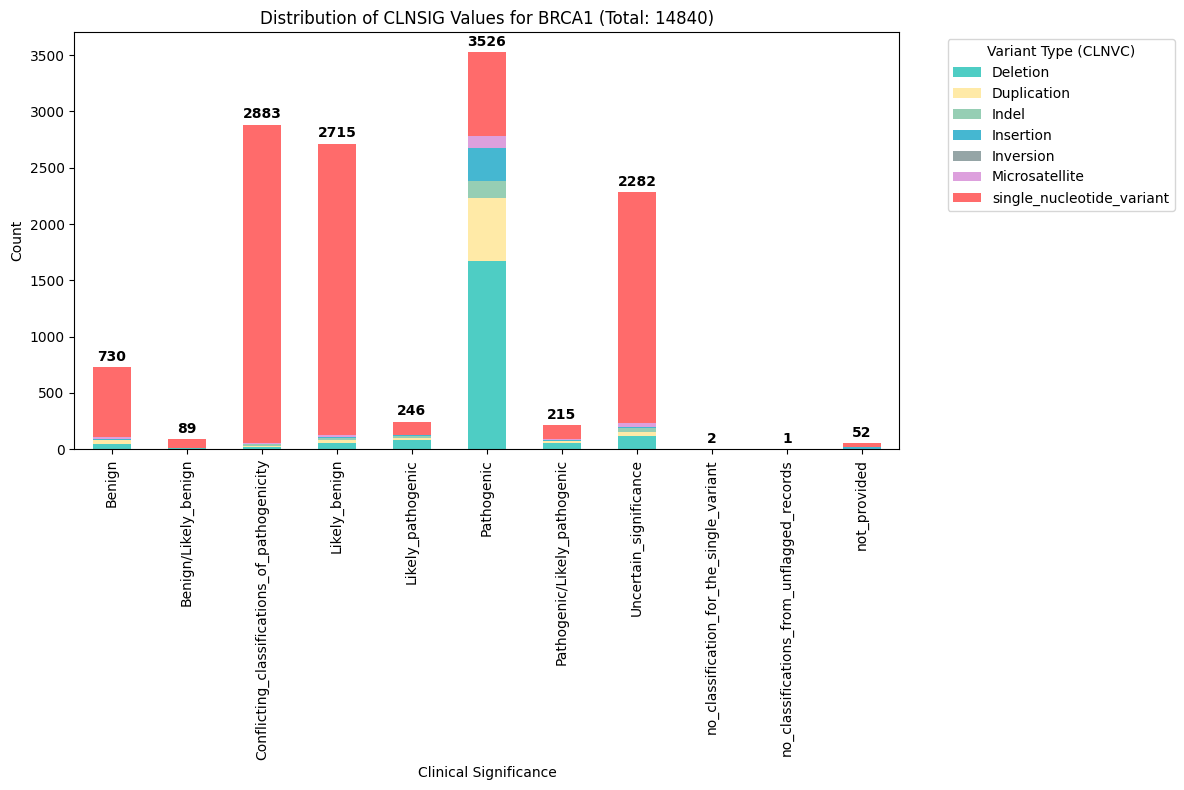

In [85]:
# Plot the distribution of CLNSIG values stacked by CLNVC
import matplotlib.pyplot as plt
import numpy as np

# Create a crosstab to get counts of CLNSIG vs CLNVC
clnsig_clnvc_crosstab = pd.crosstab(brca1_all_clinvar_df['CLNSIG'], brca1_all_clinvar_df['CLNVC'])

# Get total count for title
total_count = len(brca1_all_clinvar_df)

# Define colors for different CLNVC types
clnvc_colors = {
    'single_nucleotide_variant': '#FF6B6B',
    'Deletion': '#4ECDC4', 
    'Insertion': '#45B7D1',
    'Indel': '#96CEB4',
    'Duplication': '#FFEAA7',
    'Microsatellite': '#DDA0DD'
}

# Create the stacked bar plot
plt.figure(figsize=(8, 6))
ax = clnsig_clnvc_crosstab.plot(kind='bar', stacked=True, 
                                color=[clnvc_colors.get(col, '#95A5A6') for col in clnsig_clnvc_crosstab.columns],
                                figsize=(12, 8))

plt.title(f'Distribution of CLNSIG Values for BRCA1 (Total: {total_count})')
plt.xlabel('Clinical Significance')
plt.ylabel('Count')

# Add total counts on top of each bar
for i, clnsig in enumerate(clnsig_clnvc_crosstab.index):
    total_height = clnsig_clnvc_crosstab.loc[clnsig].sum()
    ax.text(i, total_height + 0.01 * clnsig_clnvc_crosstab.values.max(), 
            str(total_height), ha='center', va='bottom', fontweight='bold')

plt.legend(title='Variant Type (CLNVC)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Get all ClinVar Entries for BRCA2

In [86]:
brca2_all_clinvar_df = clinvar_df_for_gene(f"{DOWNLOAD_PATH}/clinvar.vcf", "BRCA2")
# Save the df to csv
brca2_all_clinvar_df.to_csv("./work/brca2_all_clinvar.csv", index=False)

clnsig_clnvc_crosstab = pd.crosstab(brca2_all_clinvar_df['CLNSIG'], brca2_all_clinvar_df['CLNVC'])
clnsig_clnvc_crosstab

[W::vcf_parse] Contig '1' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig '2' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig '3' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig '4' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig '5' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig '7' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig '8' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig '9' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig '10' is not defined in the header. (Quick workaroun

CLNVC,Deletion,Duplication,Indel,Insertion,Inversion,Microsatellite,single_nucleotide_variant
CLNSIG,,,,,,,
Benign,44,28,1,6,0,9,693
Benign/Likely_benign,9,4,0,3,0,1,92
Conflicting_classifications_of_pathogenicity,30,6,43,3,3,17,5527
Likely_benign,85,22,14,9,0,13,4548
Likely_pathogenic,131,39,26,15,0,11,104
Pathogenic,2268,815,210,285,2,167,994
Pathogenic/Likely_pathogenic,115,42,10,5,0,5,170
Uncertain_significance,202,43,66,19,5,57,3569
not_provided,2,1,0,10,0,0,11


<Figure size 800x600 with 0 Axes>

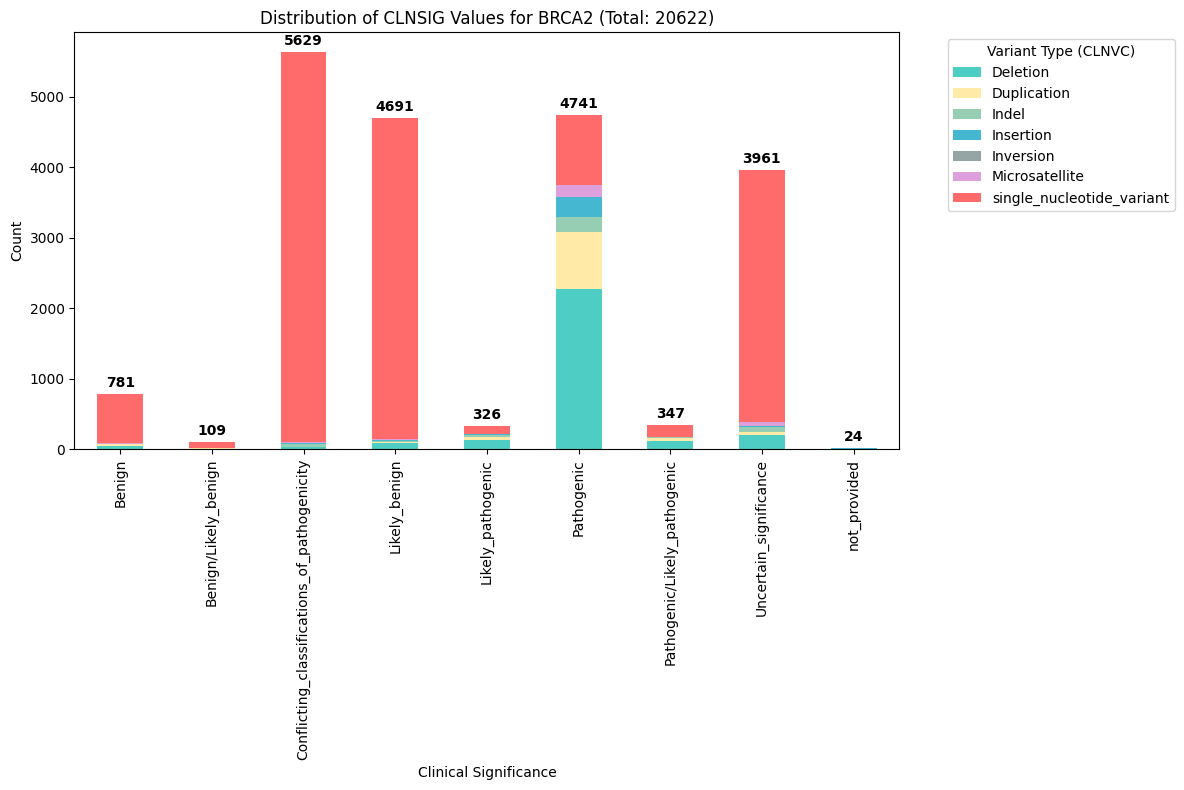

In [87]:
# Create a crosstab to get counts of CLNSIG vs CLNVC
clnsig_clnvc_crosstab = pd.crosstab(brca2_all_clinvar_df['CLNSIG'], brca2_all_clinvar_df['CLNVC'])

# Get total count for title
total_count = len(brca2_all_clinvar_df)

# Define colors for different CLNVC types
clnvc_colors = {
    'single_nucleotide_variant': '#FF6B6B',
    'Deletion': '#4ECDC4', 
    'Insertion': '#45B7D1',
    'Indel': '#96CEB4',
    'Duplication': '#FFEAA7',
    'Microsatellite': '#DDA0DD'
}

# Create the stacked bar plot
plt.figure(figsize=(8, 6))
ax = clnsig_clnvc_crosstab.plot(kind='bar', stacked=True, 
                                color=[clnvc_colors.get(col, '#95A5A6') for col in clnsig_clnvc_crosstab.columns],
                                figsize=(12, 8))

plt.title(f'Distribution of CLNSIG Values for BRCA2 (Total: {total_count})')
plt.xlabel('Clinical Significance')
plt.ylabel('Count')

# Add total counts on top of each bar
for i, clnsig in enumerate(clnsig_clnvc_crosstab.index):
    total_height = clnsig_clnvc_crosstab.loc[clnsig].sum()
    ax.text(i, total_height + 0.01 * clnsig_clnvc_crosstab.values.max(), 
            str(total_height), ha='center', va='bottom', fontweight='bold')

plt.legend(title='Variant Type (CLNVC)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

In [155]:
brca_all_clinvar_df = pd.concat([brca1_all_clinvar_df, brca2_all_clinvar_df])

# Compare with Dr Carika's files

In [88]:
# Read in Dr Carika's file
carika_df = pd.read_csv("../examples/brca1/carika_edited.txt", sep='\t', low_memory=False)
print(carika_df)

               rsid chromosome  position genotype      gs     baf     lrr
0         rs9701055          1    630053       CC  0.6551  1.0000  0.0887
1         rs9651229          1    632287       CC  0.3737  0.9610 -0.1106
2         rs9701872          1    632828       TT  0.5527  0.0174 -0.1334
3        rs11497407          1    633147       GG  0.2480  1.0000 -0.3715
4       rs116587930          1    792461       GG  0.2708  1.0000 -0.1723
...             ...        ...       ...      ...     ...     ...     ...
692050  rs142380379          Y  56684099       --  0.0000  0.2380 -4.9827
692051  rs146531086          Y  56706620       AA  0.3057  0.0000 -1.2275
692052   rs74860736          Y  56733902       --  0.0000  0.0237 -2.0529
692053  rs372439475          Y  56734789       --  0.0000  0.4388 -6.1939
692054  rs376348867          Y  56734808       --  0.0000  0.8890 -3.5570

[692055 rows x 7 columns]


In [89]:
# Filter to the default pathogenic categories
DEFAULT_CLINSIG = [
    "Pathogenic",
    "Likely_pathogenic",
    "Pathogenic/Likely_pathogenic",
]

DEFAULT_REVSTAT = [
    "practice_guideline",
    "reviewed_by_expert_panel",
]


brca1_pathogenic_df = brca1_all_clinvar_df[
    (brca1_all_clinvar_df['CLNSIG'].isin(DEFAULT_CLINSIG)) & 
    (brca1_all_clinvar_df['CLNREVSTAT'].isin(DEFAULT_REVSTAT))
].copy()
brca2_pathogenic_df = brca2_all_clinvar_df[
    (brca2_all_clinvar_df['CLNSIG'].isin(DEFAULT_CLINSIG)) & 
    (brca2_all_clinvar_df['CLNREVSTAT'].isin(DEFAULT_REVSTAT))
].copy()

# Add a column to the clinvar dfs to indicate if the variant is in the Carika file
brca1_pathogenic_df['in_carika'] = brca1_pathogenic_df['RS_prefixed'].isin(carika_df['rsid'])
brca2_pathogenic_df['in_carika'] = brca2_pathogenic_df['RS_prefixed'].isin(carika_df['rsid'])

# Get percentage of the pathogenic variants in the Carika file by RS_prefixed and rsid
carika_pathogenic_brca1 = carika_df[carika_df['rsid'].isin(brca1_pathogenic_df['RS_prefixed'])]
carika_pathogenic_brca2 = carika_df[carika_df['rsid'].isin(brca2_pathogenic_df['RS_prefixed'])]

# Get the percentage of the pathogenic variants in the Carika file by RS_prefixed and rsid
carika_pathogenic_brca1_percentage = len(carika_pathogenic_brca1) / len(brca1_pathogenic_df)
carika_pathogenic_brca2_percentage = len(carika_pathogenic_brca2) / len(brca2_pathogenic_df)
print(f"Percentage of pathogenic/Likely pathogenic variants in Carika's SNP array for BRCA1: {carika_pathogenic_brca1_percentage:.2%}")
print(f"Percentage of pathogenic/Likely pathogenic variants in Carika's SNP array for BRCA2: {carika_pathogenic_brca2_percentage:.2%}")


Percentage of pathogenic/Likely pathogenic variants in Carika's SNP array for BRCA1: 60.31%
Percentage of pathogenic/Likely pathogenic variants in Carika's SNP array for BRCA2: 59.78%


In [90]:
carika_pathogenic_brca1
print(brca1_pathogenic_df[:3])

    CHROM       POS      ID  \
161    17  43045705   55602   
177    17  43045709   55631   
179    17  43045709  266565   

                                                   REF ALT         RS  \
161  TATCAGGTAGGTGTCCAGCTCCTGGCACTGGTAGAGTGCTACACTG...   T   80359883   
177                                                  A   G   80356996   
179                                                 AG   A  886040306   

     RS_prefixed             CLNSIG   GENEINFO                      CLNVC  \
161   rs80359883         Pathogenic  BRCA1:672                   Deletion   
177   rs80356996  Likely_pathogenic  BRCA1:672  single_nucleotide_variant   
179  rs886040306         Pathogenic  BRCA1:672                   Deletion   

                   CLNREVSTAT ORIGIN  ALLELEID  in_carika  
161  reviewed_by_expert_panel      1     70269      False  
177  reviewed_by_expert_panel      1     70298      False  
179  reviewed_by_expert_panel      1    261563      False  


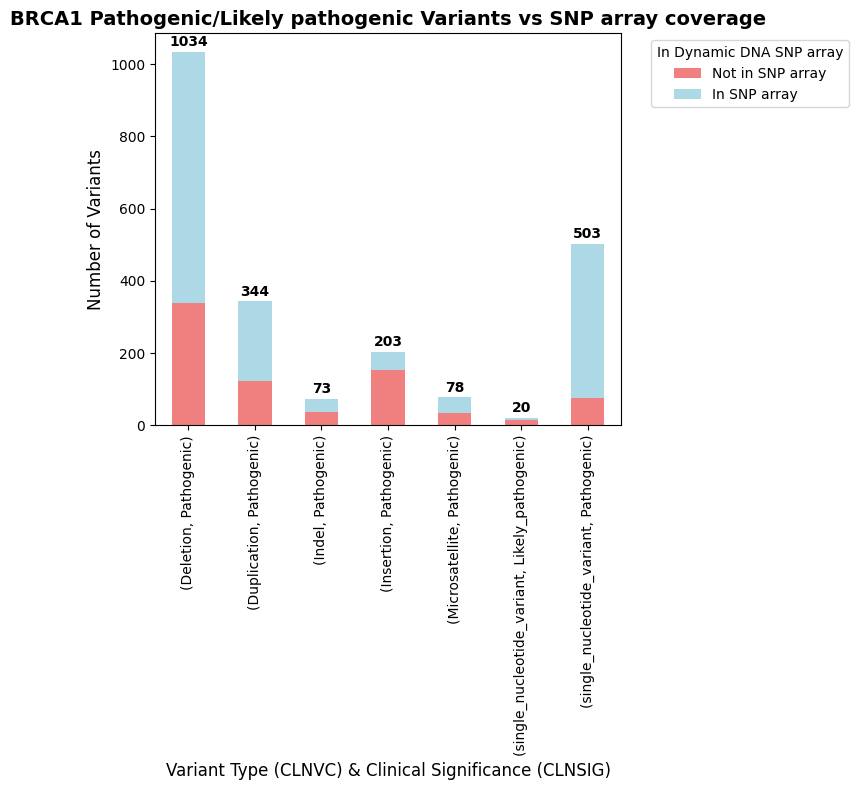


Crosstab of CLNVC & CLNSIG vs Dynamic DNA SNP array coverage:
in_carika                                    False  True 
CLNVC                     CLNSIG                         
Deletion                  Pathogenic           339    695
Duplication               Pathogenic           122    222
Indel                     Pathogenic            36     37
Insertion                 Pathogenic           154     49
Microsatellite            Pathogenic            34     44
single_nucleotide_variant Likely_pathogenic     14      6
                          Pathogenic            75    428


In [91]:
# Create a bar plot by CLNVC and CLNSIG, colored by in_carika
import matplotlib.pyplot as plt
import seaborn as sns

# Create a crosstab of CLNVC, CLNSIG and in_carika
clnvc_clnsig_carika_crosstab = pd.crosstab([brca1_pathogenic_df['CLNVC'], brca1_pathogenic_df['CLNSIG']], 
                                          brca1_pathogenic_df['in_carika'])

# Create the plot
fig, ax = plt.subplots(figsize=(8, 8))

# Create stacked bar plot
clnvc_clnsig_carika_crosstab.plot(kind='bar', stacked=True, ax=ax, 
                                 color=['lightcoral', 'lightblue'])

plt.title('BRCA1 Pathogenic/Likely pathogenic Variants vs SNP array coverage', 
          fontsize=14, fontweight='bold')
plt.xlabel('Variant Type (CLNVC) & Clinical Significance (CLNSIG)', fontsize=12)
plt.ylabel('Number of Variants', fontsize=12)

# Add total counts on top of bars
for i, (clnvc, clnsig) in enumerate(clnvc_clnsig_carika_crosstab.index):
    total_height = clnvc_clnsig_carika_crosstab.loc[(clnvc, clnsig)].sum()
    ax.text(i, total_height + 0.01 * clnvc_clnsig_carika_crosstab.values.max(), 
            str(total_height), ha='center', va='bottom', fontweight='bold')

plt.legend(title='In Dynamic DNA SNP array', labels=['Not in SNP array', 'In SNP array'], 
          bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Display the crosstab for reference
print("\nCrosstab of CLNVC & CLNSIG vs Dynamic DNA SNP array coverage:")
print(clnvc_clnsig_carika_crosstab)

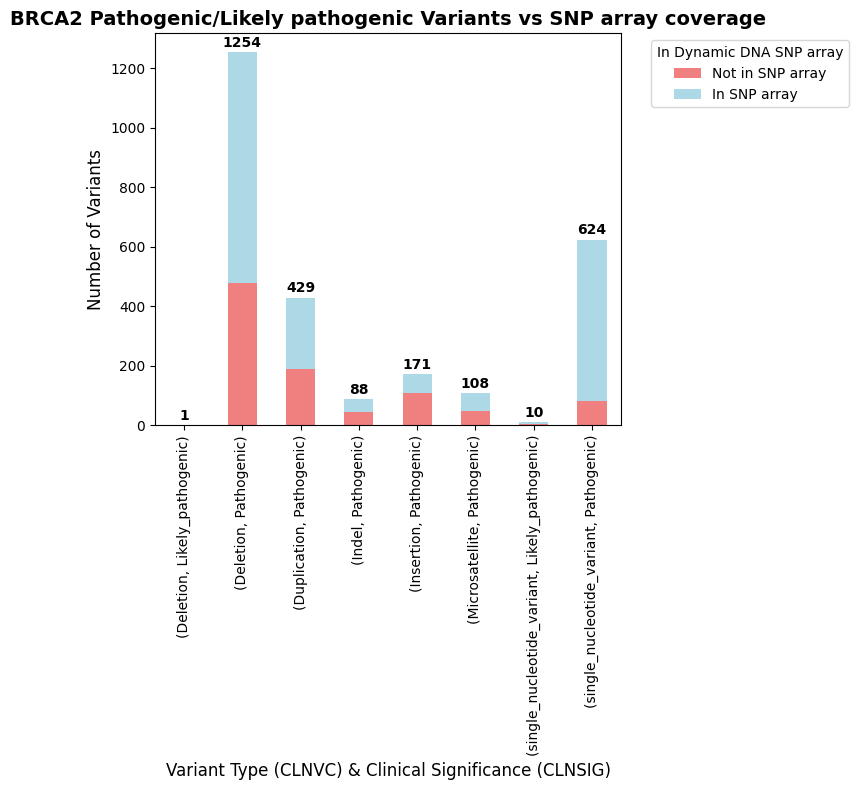


Crosstab of CLNVC & CLNSIG vs Dynamic DNA SNP array coverage:
in_carika                                    False  True 
CLNVC                     CLNSIG                         
Deletion                  Likely_pathogenic      1      0
                          Pathogenic           478    776
Duplication               Pathogenic           189    240
Indel                     Pathogenic            45     43
Insertion                 Pathogenic           109     62
Microsatellite            Pathogenic            47     61
single_nucleotide_variant Likely_pathogenic      4      6
                          Pathogenic            81    543


In [92]:
# Plot for BRCA2

# Create a bar plot by CLNVC and CLNSIG, colored by in_carika
import matplotlib.pyplot as plt
import seaborn as sns

# Create a crosstab of CLNVC, CLNSIG and in_carika
clnvc_clnsig_carika_crosstab = pd.crosstab([brca2_pathogenic_df['CLNVC'], brca2_pathogenic_df['CLNSIG']], 
                                          brca2_pathogenic_df['in_carika'])

# Create the plot
fig, ax = plt.subplots(figsize=(8, 8))

# Create stacked bar plot
clnvc_clnsig_carika_crosstab.plot(kind='bar', stacked=True, ax=ax, 
                                 color=['lightcoral', 'lightblue'])

plt.title('BRCA2 Pathogenic/Likely pathogenic Variants vs SNP array coverage', 
          fontsize=14, fontweight='bold')
plt.xlabel('Variant Type (CLNVC) & Clinical Significance (CLNSIG)', fontsize=12)
plt.ylabel('Number of Variants', fontsize=12)

# Add total counts on top of bars
for i, (clnvc, clnsig) in enumerate(clnvc_clnsig_carika_crosstab.index):
    total_height = clnvc_clnsig_carika_crosstab.loc[(clnvc, clnsig)].sum()
    ax.text(i, total_height + 0.01 * clnvc_clnsig_carika_crosstab.values.max(), 
            str(total_height), ha='center', va='bottom', fontweight='bold')

plt.legend(title='In Dynamic DNA SNP array', labels=['Not in SNP array', 'In SNP array'], 
          bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Display the crosstab for reference
print("\nCrosstab of CLNVC & CLNSIG vs Dynamic DNA SNP array coverage:")
print(clnvc_clnsig_carika_crosstab)

In [94]:
# Join brca1_pathogenic_df and carika file on RS_prefixed and rsid
brca1_pathogenic_df_merged = brca1_pathogenic_df.merge(carika_df, left_on='RS_prefixed', right_on='rsid', how='left')
brca1_pathogenic_df_merged
# Save the df to csv
brca1_pathogenic_df_merged.to_csv("./work/brca1_pathogenic_df_with_carika.csv", index=False)
# Join brca2_pathogenic_df and carika file on RS_prefixed and rsid
brca2_pathogenic_df_merged = brca2_pathogenic_df.merge(carika_df, left_on='RS_prefixed', right_on='rsid', how='left')
brca2_pathogenic_df_merged
# Save the df to csv
brca2_pathogenic_df_merged.to_csv("./work/brca2_pathogenic_df_with_carika.csv", index=False)


# Now we are going to match and merge the variants

In [181]:
# BRCA1 position is roughly chr17:43041660-43125358
# BRCA2 position is roughly chr13:32314943-32910424

# This is carika_df
#                rsid chromosome  position genotype      gs     baf     lrr
# 0         rs9701055          1    630053       CC  0.6551  1.0000  0.0887
# 1         rs9651229          1    632287       CC  0.3737  0.9610 -0.1106
# 2         rs9701872          1    632828       TT  0.5527  0.0174 -0.1334
# 3        rs11497407          1    633147       GG  0.2480  1.0000 -0.3715
# 4       rs116587930          1    792461       GG  0.2708  1.0000 -0.1723

# This is brca1_pathogenic_df
#     CHROM       POS      ID  \
# 161    17  43045705   55602   
# 177    17  43045709   55631   
# 179    17  43045709  266565   

#                                                    REF ALT         RS  \
# 161  TATCAGGTAGGTGTCCAGCTCCTGGCACTGGTAGAGTGCTACACTG...   T   80359883   
# 177                                                  A   G   80356996   
# 179                                                 AG   A  886040306   

#      RS_prefixed             CLNSIG   GENEINFO                      CLNVC  \
# 161   rs80359883         Pathogenic  BRCA1:672                   Deletion   
# 177   rs80356996  Likely_pathogenic  BRCA1:672  single_nucleotide_variant   
# 179  rs886040306         Pathogenic  BRCA1:672                   Deletion   

#                    CLNREVSTAT ORIGIN  ALLELEID  in_carika  
# 161  reviewed_by_expert_panel      1     70269      False  
# 177  reviewed_by_expert_panel      1     70298      False  
# 179  reviewed_by_expert_panel      1    261563      False

# Read in Dr Carika's file
carika_df = pd.read_csv("../examples/brca1/carika_edited.txt", sep='\t', low_memory=False)
print(carika_df)

# Get all brca1 variants by chromosome and position
all_carika_brca1_variants = carika_df[
    (carika_df['chromosome'] == '17') & 
    (carika_df['position'] >= 43041660) & 
    (carika_df['position'] <= 43125358)
].copy()

# Add a column called is_in_clinvar_rsid that is True if the rsid is in the brca1_pathogenic_df['RS_prefixed']
all_carika_brca1_variants['is_in_clinvar_rsid'] = all_carika_brca1_variants['rsid'].isin(brca1_all_clinvar_df['RS_prefixed'])

# Get number of rows that are all_carika_brca1_variants not is_in_clinvar_rsid
print(f"Total BRCA1 variants in Carika: {len(all_carika_brca1_variants)}")
print(f"BRCA1 variants in Carika not in ClinVar: {len(all_carika_brca1_variants[all_carika_brca1_variants['is_in_clinvar_rsid'] == False])}")

# Also do for brca2
all_carika_brca2_variants = carika_df[
    (carika_df['chromosome'] == '13') & 
    (carika_df['position'] >= 32314943) & 
    (carika_df['position'] <= 32910424)
].copy()

# Add a column called is_in_clinvar_rsid that is True if the rsid is in the brca2_all_clinvar_df['RS_prefixed']
all_carika_brca2_variants['is_in_clinvar_rsid'] = all_carika_brca2_variants['rsid'].isin(brca2_all_clinvar_df['RS_prefixed'])

print(f"Total BRCA2 variants in Carika: {len(all_carika_brca2_variants)}")
print(f"BRCA2 variants in Carika not in ClinVar: {len(all_carika_brca2_variants[all_carika_brca2_variants['is_in_clinvar_rsid'] == False])}")

# Concat the two dfs
all_carika_brca1_and_2_variants = pd.concat([all_carika_brca1_variants, all_carika_brca2_variants])

# Write to csv
all_carika_brca1_and_2_variants.to_csv("./work/all_carika_brca1_and_2_variants.csv", index=False)


# # Merge on chromosome/position - need to match column names properly
# # carika_df has 'chromosome' and 'position'
# # brca1_pathogenic_df has 'CHROM' and 'POS'
# all_carika_brca1_variants = all_carika_brca1_variants.merge(
#     brca1_all_clinvar_df, 
#     left_on=['rsid'], 
#     right_on=['RS_prefixed'], 
#     how='left'
# )

# # Write to csv
# all_carika_brca1_variants.to_csv("./work/all_carika_brca1_variants.csv", index=False)

# all_carika_brca2_variants = all_carika_brca2_variants.merge(
#     brca2_all_clinvar_df, 
#     left_on=['rsid'], 
#     right_on=['RS_prefixed'], 
#     how='left'
# )

# # Write to csv
# all_carika_brca2_variants.to_csv("./work/all_carika_brca2_variants.csv", index=False)


               rsid chromosome  position genotype      gs     baf     lrr
0         rs9701055          1    630053       CC  0.6551  1.0000  0.0887
1         rs9651229          1    632287       CC  0.3737  0.9610 -0.1106
2         rs9701872          1    632828       TT  0.5527  0.0174 -0.1334
3        rs11497407          1    633147       GG  0.2480  1.0000 -0.3715
4       rs116587930          1    792461       GG  0.2708  1.0000 -0.1723
...             ...        ...       ...      ...     ...     ...     ...
692050  rs142380379          Y  56684099       --  0.0000  0.2380 -4.9827
692051  rs146531086          Y  56706620       AA  0.3057  0.0000 -1.2275
692052   rs74860736          Y  56733902       --  0.0000  0.0237 -2.0529
692053  rs372439475          Y  56734789       --  0.0000  0.4388 -6.1939
692054  rs376348867          Y  56734808       --  0.0000  0.8890 -3.5570

[692055 rows x 7 columns]
Total BRCA1 variants in Carika: 1983
BRCA1 variants in Carika not in ClinVar: 162
Tot

In [182]:
# Only look at the not in clinvar variants. 
brca_not_in_clinvar_variants = all_carika_brca1_and_2_variants[all_carika_brca1_and_2_variants['is_in_clinvar_rsid'] == False]
# Filter out the rsids that are '.'
brca_not_in_clinvar_variants = brca_not_in_clinvar_variants[brca_not_in_clinvar_variants['rsid'] != '.']

len(brca_not_in_clinvar_variants)

276

In [185]:
# Now we try to update the rsids to the latest rsids. 
import pandas as pd
import requests
import time
import os

def get_current_rsid(rsid):
    url = f"https://rest.ensembl.org/variation/human/{rsid}?content-type=application/json"
    try:
        r = requests.get(url, timeout=10)
        if not r.ok:
            return None
        data = r.json()
        if data.get("name"):
            print(f"Found {data['name']} for {rsid}")
            return data["name"]
        print(f"No name found for {rsid}")
        return rsid
    except Exception as e:
        print(f"Error querying {rsid}: {e}")
        return None

# Load existing mappings if they exist
mapping_file = "./work/brca_rsid_mappings.csv"
rsid_mappings = {}

# --- Loop through rsIDs and query Ensembl ---
unique_rsids = brca_not_in_clinvar_variants["rsid"].unique()

for old_rsid in unique_rsids:
    current_rsid = get_current_rsid(old_rsid)   
    if current_rsid is not None:
        rsid_mappings[old_rsid] = current_rsid
    else:
        rsid_mappings[old_rsid] = old_rsid

# Save final mappings to CSV
mappings_df = pd.DataFrame({
    "old_rsid": list(rsid_mappings.keys()),
    "updated_rsid": list(rsid_mappings.values())
})

mappings_df.to_csv(mapping_file, index=False)
print(f"Final save: {len(rsid_mappings)} mappings to {mapping_file}")

Found rs397509291 for rs886040299
Found rs80357934 for rs886040296
Found rs1010052501 for rs1010052501
Found rs80357838 for rs397507249
Found rs80357751 for rs876660010
Found rs80357886 for rs397509255
Found rs34570933 for rs397509235
Found rs80357867 for rs1391722830
Found rs730880288 for rs886038041
Found rs483353097 for rs483353097
Found rs80357653 for rs1401944731
Found rs80357656 for rs886040256
Found rs80357916 for rs397509169
Found rs273900723 for rs273900725
Found rs80357572 for rs397509143
Found rs80357864 for rs876659865
Found rs80357634 for rs886040173
Found rs80357842 for rs1456064170
Found rs80357616 for rs397509110
Found rs80357579 for rs1369534394
Found rs80357512 for rs886038020
Found rs80357621 for rs761143251
Found rs397507216 for rs397509077
Found rs397509063 for rs886040127
Found rs80357701 for rs1323582820
Found rs80357575 for rs80358334
Found rs80357829 for rs397509032
Found rs80357627 for rs397509026
Found rs397509012 for rs878853291
Found rs80357614 for rs803576

In [215]:
brca_rsid_mapping_table = pd.read_csv("./work/brca_rsid_mappings.csv")

all_carika_brca1_and_2_variants = pd.concat([all_carika_brca1_variants, all_carika_brca2_variants])

# Go back and look at all_carika_brca1_and_2_variants again. 
all_carika_brca1_and_2_variants["updated_rsid"] = all_carika_brca1_and_2_variants["rsid"]
# Create a mapping dictionary from the mapping table
rsid_mapping_dict = dict(zip(brca_rsid_mapping_table["old_rsid"], brca_rsid_mapping_table["updated_rsid"]))
# Map the updated_rsid only for those that exist in the mapping table
all_carika_brca1_and_2_variants["updated_rsid"] = all_carika_brca1_and_2_variants["rsid"].map(rsid_mapping_dict).fillna(all_carika_brca1_and_2_variants["rsid"])

# Update is_in_clinvar_rsid based on 
all_carika_brca1_and_2_variants["is_in_clinvar_rsid"] = all_carika_brca1_and_2_variants["updated_rsid"].isin(brca_all_clinvar_df['RS_prefixed'])

# # Merge with clinvar df
# all_carika_brca1_and_2_variants = all_carika_brca1_and_2_variants.merge(brca_all_clinvar_df, left_on='updated_rsid', right_on='RS_prefixed', how='left')

# # Write to csv
# all_carika_brca1_and_2_variants.to_csv("./work/all_carika_brca1_and_2_variants_updated_rsid.csv", index=False)

# Print how many of the variants are is_in_clinvar_rsid
variants_in_clinvar = len(all_carika_brca1_and_2_variants[all_carika_brca1_and_2_variants['is_in_clinvar_rsid'] == True])
variants_not_in_clinvar = len(all_carika_brca1_and_2_variants[all_carika_brca1_and_2_variants['is_in_clinvar_rsid'] == False])

print(f"BRCA1/BRCA2 variants found in ClinVar (after rsID mapping): {variants_in_clinvar}")
print(f"BRCA1/BRCA2 variants NOT found in ClinVar (after rsID mapping): {variants_not_in_clinvar}")
print(f"Total BRCA1/BRCA2 variants: {variants_in_clinvar + variants_not_in_clinvar}")

# Merge with the clinvar df and save to csv
all_carika_brca1_and_2_variants = all_carika_brca1_and_2_variants.merge(brca_all_clinvar_df, left_on='updated_rsid', right_on='RS_prefixed', how='left')
all_carika_brca1_and_2_variants.to_csv("./work/all_carika_brca1_and_2_variants_updated_rsid_and_clinvar.csv", index=False)


BRCA1/BRCA2 variants found in ClinVar (after rsID mapping): 4309
BRCA1/BRCA2 variants NOT found in ClinVar (after rsID mapping): 420
Total BRCA1/BRCA2 variants: 4729


In [225]:
# Looks like some of the rsid are duplicated. look at how many updated_rsid occur more than once. 
num_occurance_per_variant = all_carika_brca1_and_2_variants['updated_rsid'].value_counts()
num_occurance_per_variant

# Get how many > 1 and also updated_rsid is not .
duplicated_rsids = num_occurance_per_variant[(num_occurance_per_variant > 1) & (num_occurance_per_variant.index != '.')]
all_carika_brca1_and_2_variants[all_carika_brca1_and_2_variants['updated_rsid'].isin(duplicated_rsids.index)]
# Write to csv
all_carika_brca1_and_2_variants[all_carika_brca1_and_2_variants['updated_rsid'].isin(duplicated_rsids.index)].to_csv("./work/all_carika_brca1_and_2_variants_updated_rsid_and_clinvar_duplicated.csv", index=False)


# !!! THERE IS ACTUALLY A LOT OF DUPLICATED ROWS!!!
But many of them are the case of A>T and A>C etc, and these can have different pathogenicity. 

In [217]:
all_carika_brca1_and_2_variants[all_carika_brca1_and_2_variants['is_in_clinvar_rsid'] == False]

,rsid,chromosome,position,genotype,gs,baf,lrr,is_in_clinvar_rsid,updated_rsid,CHROM,...,REF,ALT,RS,RS_prefixed,CLNSIG,GENEINFO,CLNVC,CLNREVSTAT,ORIGIN,ALLELEID
1,.,17,43044407,AA,0.4829,0.0000,0.1127,False,.,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,.,17,43045752,II,0.4716,1.0000,-0.0702,False,.,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,.,17,43047643,DD,0.5005,1.0000,0.0522,False,.,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125,.,17,43047682,DD,0.5002,1.0000,-0.0261,False,.,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
146,rs1010052501,17,43048721,II,0.5219,0.0052,0.0214,False,rs1010052501,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7150,rs143540473,13,32892625,CC,0.7021,0.9974,0.0476,False,rs143540473,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7151,rs7996727,13,32892639,TT,0.8192,0.0000,-0.2918,False,rs7996727,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7152,rs77685241,13,32893244,CC,0.8370,0.9972,-0.0740,False,rs77685241,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7153,rs73174942,13,32899139,GG,0.9291,1.0000,0.0775,False,rs73174942,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Based on this new mapping, look at the proportion that's found in ClinVar

In [218]:
# Filter to the default pathogenic categories
DEFAULT_CLINSIG = [
    "Pathogenic",
    "Likely_pathogenic",
    "Pathogenic/Likely_pathogenic",
]

DEFAULT_REVSTAT = [
    "practice_guideline",
    "reviewed_by_expert_panel",
]


brca1_pathogenic_df = brca1_all_clinvar_df[
    (brca1_all_clinvar_df['CLNSIG'].isin(DEFAULT_CLINSIG)) & 
    (brca1_all_clinvar_df['CLNREVSTAT'].isin(DEFAULT_REVSTAT))
].copy()
brca2_pathogenic_df = brca2_all_clinvar_df[
    (brca2_all_clinvar_df['CLNSIG'].isin(DEFAULT_CLINSIG)) & 
    (brca2_all_clinvar_df['CLNREVSTAT'].isin(DEFAULT_REVSTAT))
].copy()

# Add a column to the clinvar dfs to indicate if the variant is in the Carika file
brca1_pathogenic_df['in_carika'] = brca1_pathogenic_df['RS_prefixed'].isin(all_carika_brca1_and_2_variants['updated_rsid'])
brca2_pathogenic_df['in_carika'] = brca2_pathogenic_df['RS_prefixed'].isin(all_carika_brca1_and_2_variants['updated_rsid'])

# Get percentage of how many are in the Carika file
carika_pathogenic_brca1_percentage = len(brca1_pathogenic_df[brca1_pathogenic_df['in_carika'] == True]) / len(brca1_pathogenic_df)
carika_pathogenic_brca2_percentage = len(brca2_pathogenic_df[brca2_pathogenic_df['in_carika'] == True]) / len(brca2_pathogenic_df)

print(f"Percentage of pathogenic/Likely pathogenic variants in Dynamic DNA SNP array for BRCA1: {carika_pathogenic_brca1_percentage:.2%}")
print(f"Percentage of pathogenic/Likely pathogenic variants in Dynamic DNA SNP array for BRCA2: {carika_pathogenic_brca2_percentage:.2%}")


Percentage of pathogenic/Likely pathogenic variants in Dynamic DNA SNP array for BRCA1: 67.01%
Percentage of pathogenic/Likely pathogenic variants in Dynamic DNA SNP array for BRCA2: 68.23%


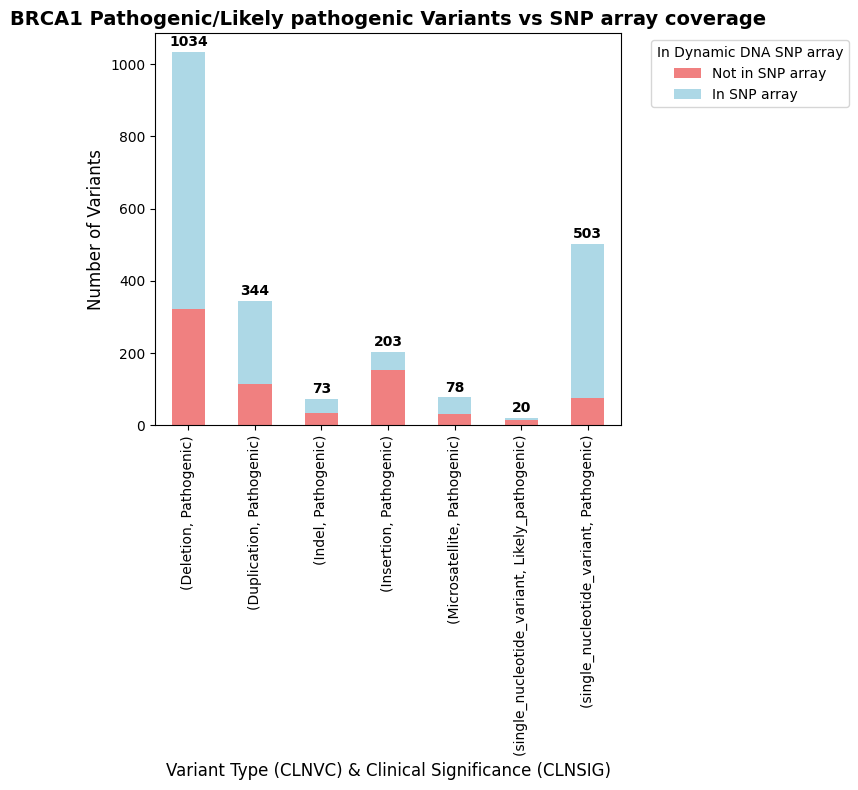


Crosstab of CLNVC & CLNSIG vs Dynamic DNA SNP array coverage:
in_carika                                    False  True 
CLNVC                     CLNSIG                         
Deletion                  Pathogenic           323    711
Duplication               Pathogenic           113    231
Indel                     Pathogenic            35     38
Insertion                 Pathogenic           154     49
Microsatellite            Pathogenic            30     48
single_nucleotide_variant Likely_pathogenic     14      6
                          Pathogenic            75    428


In [219]:
# Create a bar plot by CLNVC and CLNSIG, colored by in_carika
import matplotlib.pyplot as plt
import seaborn as sns

# Create a crosstab of CLNVC, CLNSIG and in_carika
clnvc_clnsig_carika_crosstab = pd.crosstab([brca1_pathogenic_df['CLNVC'], brca1_pathogenic_df['CLNSIG']], 
                                          brca1_pathogenic_df['in_carika'])

# Create the plot
fig, ax = plt.subplots(figsize=(8, 8))

# Create stacked bar plot
clnvc_clnsig_carika_crosstab.plot(kind='bar', stacked=True, ax=ax, 
                                 color=['lightcoral', 'lightblue'])

plt.title('BRCA1 Pathogenic/Likely pathogenic Variants vs SNP array coverage', 
          fontsize=14, fontweight='bold')
plt.xlabel('Variant Type (CLNVC) & Clinical Significance (CLNSIG)', fontsize=12)
plt.ylabel('Number of Variants', fontsize=12)

# Add total counts on top of bars
for i, (clnvc, clnsig) in enumerate(clnvc_clnsig_carika_crosstab.index):
    total_height = clnvc_clnsig_carika_crosstab.loc[(clnvc, clnsig)].sum()
    ax.text(i, total_height + 0.01 * clnvc_clnsig_carika_crosstab.values.max(), 
            str(total_height), ha='center', va='bottom', fontweight='bold')

plt.legend(title='In Dynamic DNA SNP array', labels=['Not in SNP array', 'In SNP array'], 
          bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Display the crosstab for reference
print("\nCrosstab of CLNVC & CLNSIG vs Dynamic DNA SNP array coverage:")
print(clnvc_clnsig_carika_crosstab)

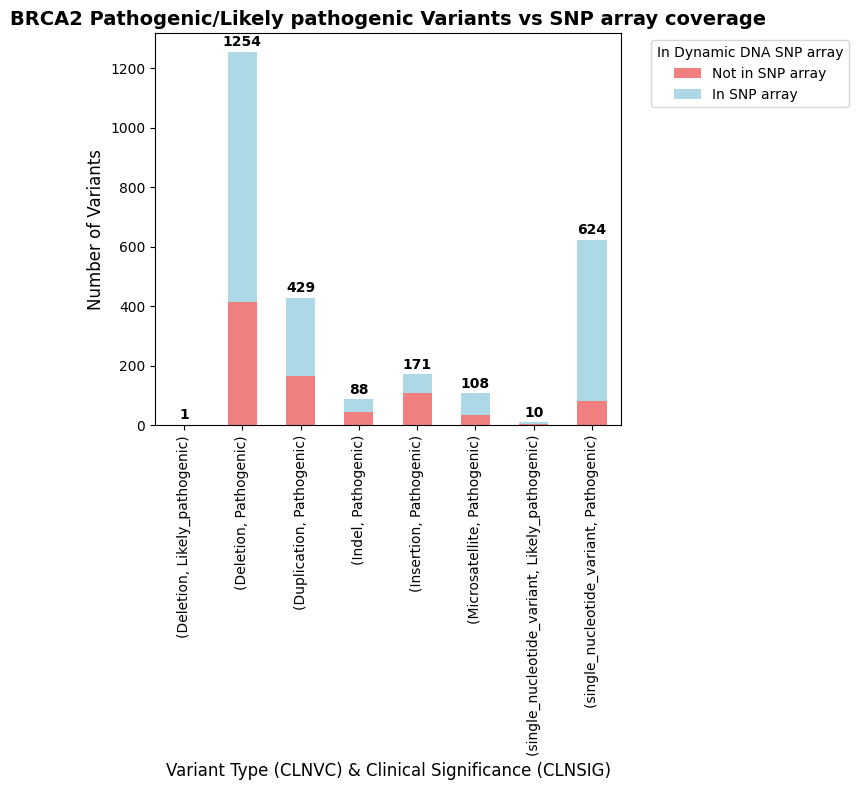


Crosstab of CLNVC & CLNSIG vs Dynamic DNA SNP array coverage:
in_carika                                    False  True 
CLNVC                     CLNSIG                         
Deletion                  Likely_pathogenic      0      1
                          Pathogenic           413    841
Duplication               Pathogenic           166    263
Indel                     Pathogenic            45     43
Insertion                 Pathogenic           109     62
Microsatellite            Pathogenic            35     73
single_nucleotide_variant Likely_pathogenic      4      6
                          Pathogenic            81    543


In [220]:
# Plot for BRCA2

# Create a bar plot by CLNVC and CLNSIG, colored by in_carika
import matplotlib.pyplot as plt
import seaborn as sns

# Create a crosstab of CLNVC, CLNSIG and in_carika
clnvc_clnsig_carika_crosstab = pd.crosstab([brca2_pathogenic_df['CLNVC'], brca2_pathogenic_df['CLNSIG']], 
                                          brca2_pathogenic_df['in_carika'])

# Create the plot
fig, ax = plt.subplots(figsize=(8, 8))

# Create stacked bar plot
clnvc_clnsig_carika_crosstab.plot(kind='bar', stacked=True, ax=ax, 
                                 color=['lightcoral', 'lightblue'])

plt.title('BRCA2 Pathogenic/Likely pathogenic Variants vs SNP array coverage', 
          fontsize=14, fontweight='bold')
plt.xlabel('Variant Type (CLNVC) & Clinical Significance (CLNSIG)', fontsize=12)
plt.ylabel('Number of Variants', fontsize=12)

# Add total counts on top of bars
for i, (clnvc, clnsig) in enumerate(clnvc_clnsig_carika_crosstab.index):
    total_height = clnvc_clnsig_carika_crosstab.loc[(clnvc, clnsig)].sum()
    ax.text(i, total_height + 0.01 * clnvc_clnsig_carika_crosstab.values.max(), 
            str(total_height), ha='center', va='bottom', fontweight='bold')

plt.legend(title='In Dynamic DNA SNP array', labels=['Not in SNP array', 'In SNP array'], 
          bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Display the crosstab for reference
print("\nCrosstab of CLNVC & CLNSIG vs Dynamic DNA SNP array coverage:")
print(clnvc_clnsig_carika_crosstab)